# Python-MLearning: Digits Recognition using Logistic Regression (LR), PCA Reduced Dimension, and Sklearn Library

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I GENERALITIES

This paper deals with an application of the Logistic Regression (LR) algorithm to the MNIST database, in order to obtain a model that allows to recognize handwritten digits and classify them in an appropriate way.

The model obtained consider the PCA components of the database (154) that explain 95% of the total variation of the data.

RandomizedSearchCV search is used to access suitable hyperparameters within a proposed range.

The MNIST database is available at http://yann.lecun.com/exdb/mnist/. The present project initially considers a complete version of MINIST called "mnist_My.csv" which includes the 70 thousand original images. This is achieved by joining the training (60,000 images) and testing (10,000) files that are usually delivered separately.

RandomizedSearchCV takes a non-depressible time to access the results. For this reason, I consider only a small sample to perform the search (the same train dataset instead the full dataset), and then I project the results to the remaining base. Of course, all this is done with the ultimate goal of reducing processing times, nothing more.

Finally, a way to explore the MNIST database can be found [here](http://www.arqmain.net/Researches/Researchs/Digit_Recognition/Exploratory_DAnalysis/Exploratory_DAnalysis_MNIST_RProject.html).

# II IMPORT REQUIRED PACKAGES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
from datetime import datetime
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve 
from sklearn.decomposition import PCA

#sklearn.linear_model.LogisticRegression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# III LOADING DATA

In [4]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\Logistic Regression\\Logistic2'

In [5]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'Logistic Classification on Digit numbers.txt',
 'Material Support',
 'python - Scikit-learn - feature reduction using RFECV and GridSearch.pdf',
 'PYTHON-MLearning_LR2_FULL_Final .ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL_Final.ipynb',
 'PYTHON-MLearning_LR2_PCA_Final.ipynb',
 'PYTHON-MLearning_LR2_PCA_OPTIMAL_Final.ipynb',
 'PYTHON-MLearning_NN3_Final.ipynb']

In [6]:
# read csv (comma separated value) into data
data=pd.read_csv('..\..\RandomForest\RandomForest2\mnist_My.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

# IV MODELING

## Reduce the 784 dimension into 95% information

In [8]:
#Reduce the 784 dimension into 95% information
pca = PCA(.95)
data_pca = pca.fit_transform(X_data)

## Train and Validation Datasets

In [9]:
#Divide data_pca and Y_data into train and test data
X_train_pca, X_test_pca, y_train_pca,  y_test_pca = train_test_split(data_pca, y_data, test_size=0.98, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((1400, 154), (68600, 154), (1400,), (68600,))

Text(0.5,1,'Projection on the Two First Principal Components ')

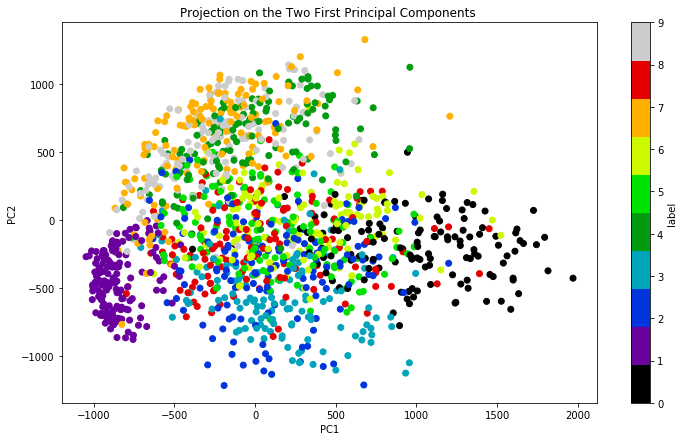

In [10]:
#plot of two first components
pl.subplots(nrows=1, ncols=1, figsize=(12,7))
pl.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=pl.get_cmap('nipy_spectral', 10))
pl.colorbar(label='label')
pl.xlabel('PC1')
pl.ylabel('PC2')
pl.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

## Build Model

### What values for the model's hyperparameters would be selected?

In [11]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'C': np.arange(0.5, 3, 0.5),      
           "solver" : ['newton-cg', 'lbfgs']}

# Instantiate a Logistic Regression classifier:
lr = LogisticRegression( n_jobs=-1, random_state=7) 

# Instantiate the RandomizedSearchCV object: rf_cv
kfold = StratifiedKFold(n_splits=3, random_state=0)
lr_cv = RandomizedSearchCV(lr, param_dist, scoring = 'accuracy', n_jobs=-1, cv=kfold)

# Fit it to the data
lr_cv.fit(X_train_pca, y_train_pca)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:10:45.834939 seconds.


In [12]:
# Print the tuned parameters and score
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

Tuned LR Parameters: {'solver': 'newton-cg', 'C': 0.5}
Best score is 0.8321428571428572


## Using the best parameters to Fit, Evaluate, and Make predictions

## Fitting the Model

In [13]:
# train your model using X_train, y_train and the best known parameters
lrpca = LogisticRegression( C=0.5, solver='lbfgs', n_jobs=-1, random_state=7)
lrpca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=7, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluating the Model

#### <font color=orange><i>Getting Accuracy and Confusion Matrix</i></font>

In [14]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(lrpca.score(X_train_pca,y_train_pca),4)) # accuracy 

With LR train datasets () accuracy is:  0.9993


In [17]:
predictions = lrpca.predict(X_test_pca)
print('Accuracy based on X_test_pca, y_test_pca: ',accuracy_score(y_test_pca, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test_pca, predictions))
print('With LR train datasets () accuracy is: ',round(lrpca.score(X_train_pca,y_train_pca),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test_pca, predictions))

Accuracy based on X_test_pca, y_test_pca:  0.79067055393586

Confusion Matrix:
  [[6172   24   37   26   35  143  162   57   66   43]
 [   2 7290   52   55   27   49   55   25  136   28]
 [ 209  283 4897  323  263   52  417  182  165   59]
 [  67  128  235 5397   40  288  262  183  132  266]
 [  18   54   94   48 5551  122  239  122  127  313]
 [ 149  169   89  544  302 4123  296   71  236  208]
 [ 117  118  217   17  298  188 5617   43   94   29]
 [ 111  160  101   46  133   89   69 6115   27  296]
 [  96  421  263  196  206  443  307  114 4388  255]
 [  58   55   64  132  668  175  111  638  228 4690]]
With LR train datasets () accuracy is:  0.9993
             precision    recall  f1-score   support

          0       0.88      0.91      0.90      6765
          1       0.84      0.94      0.89      7719
          2       0.81      0.71      0.76      6850
          3       0.80      0.77      0.78      6998
          4       0.74      0.83      0.78      6688
          5       0.73

Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on LR testing datasets (X_test_pca, y_test_pca), looks like we misclassified 14360 digit's images, leaving us with a 79.07% accuracy rate  (with 79% precision and 79% recall). Meantime, With LR train datasets (X_train_pca,y_train_pca) accuracy is  99.93%

#### <font color=orange><i>Examining the Model's Mistakes</i></font>

Let us determine the examples in the validation set where the model predictions were wrong. These correspond to the elements of <font color=red>y_test</font> that are not equal to the same entry in <font color=red>predictions</font>. The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are:

In [18]:
error_idx = np.where(y_test_pca != predictions)[0]
error_idx
#pd.Series(error_idx.tolist())

array([    8,    14,    15, ..., 68595, 68598, 68599], dtype=int64)

In [19]:
len(error_idx)

14360

We'll choose 20 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

In [20]:
rand_idx = np.random.choice(error_idx, size=20, replace=False)
rand_idx

array([20442,  5288, 22916, 53811, 29662,   825, 60304, 14447,  3811,
       68504, 47611, 56766, 50940,  4392, 19302, 54814, 66309, 47778,
       25909, 36901], dtype=int64)

The PCA procedure of Sklearn allows us to move from a compressed representation (in our case 154 components) to an approximation of the original high-dimensional data (784 variables). This is really cool, isn’t it? o, now we use this option to generate the desired visualization.

In [21]:
Xtest784back = pca.inverse_transform(X_test_pca)

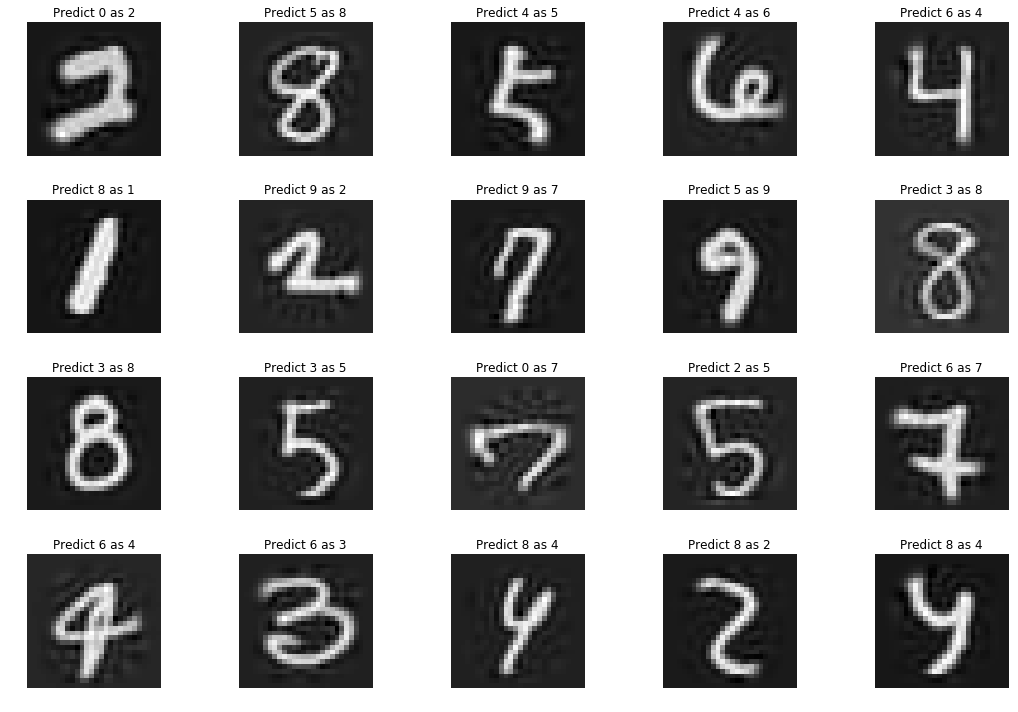

In [23]:
fig, axs = pl.subplots(nrows=4, ncols=5, figsize=(15,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Predict %d as %d" % (predictions[rand_idx[i]],y_test_pca[rand_idx[i]]))
    ax.imshow(Xtest784back[rand_idx[i]].reshape(28,28), cmap=pl.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
pl.tight_layout()    
pl.show()

In the exploratory stage of these data () it is concluded that we should expect that the model does not present an extremely high accuracy because the digits have different strokes and, in some cases, turn out to be very strange.
  
From the previous visualization, we can see that the errors of classification of the images are based on that, in general, we can find some cases in which the writing is deficient or the digit has a strange orientation.

This situation, which usually is not a real problem for a human being, constitutes a base of error not easy to overcome by a computational algorithm.

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [24]:
predictions = cross_val_predict(lrpca, X_train_pca, y_train_pca, cv=3)
print('Prediction: {}', predictions)

Prediction: {} [3 1 6 ... 7 3 3]


#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset.  In our case, the new dataset is the X_test one.

In [25]:
# train your model using all data.
startTime = datetime.now()
lrpca.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:03:08.729794 seconds.


In [26]:
predictions = lrpca.predict(X_test_pca)
print('Prediction: {}', predictions)

Prediction: {} [6 0 5 ... 4 7 9]


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>